In [22]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats

import pymc3 as pm
import theano.tensor as tt
import scipy
from scipy import optimize

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.major.size'] = 20

In [3]:
sleep_data = pd.read_csv('sleep_data.csv')
wake_data = pd.read_csv('wake_data.csv')

In [7]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2018-01-01 21:00:00,0,-60
1,2018-01-01 21:01:00,0,-59
2,2018-01-01 21:02:00,0,-58
3,2018-01-01 21:03:00,0,-57
4,2018-01-01 21:04:00,0,-56


In [4]:
print('Number of sleep observations %d' % len(sleep_data))


Number of sleep observations 5760


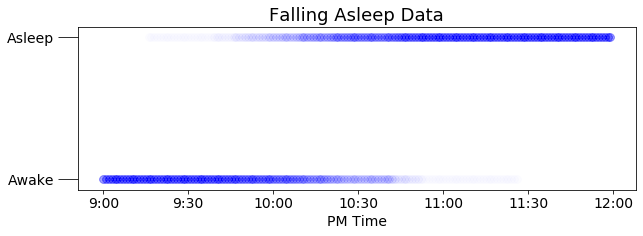

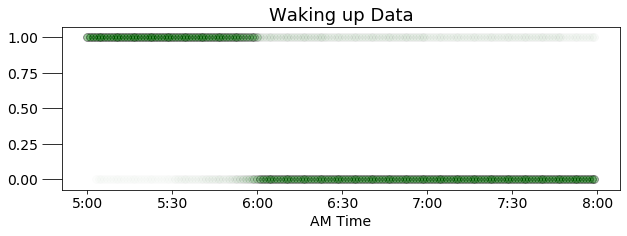

In [24]:

sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']
# Sleep data
plt.figure
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'], 
            s= 60, alpha=0.01, facecolor = 'b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep']); plt.xlabel('PM Time'); 
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

plt.figure()
plt.scatter(wake_data['time_offset'], wake_data['indicator'], 
            s= 60, alpha=0.01, facecolor = 'g', edgecolors='k')
#plt.yticks([0, 1], ['Awake', 'Asleep']); 
plt.xlabel('AM Time'); 
plt.title('Waking up Data', size = 18)
wake_labels = ['5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00']
plt.xticks([-60, -30, 0, 30, 60, 90, 120], wake_labels);

In [29]:
def logistic(x,b, a=0):
    return 1/(1+ np.exp(b*x + a))

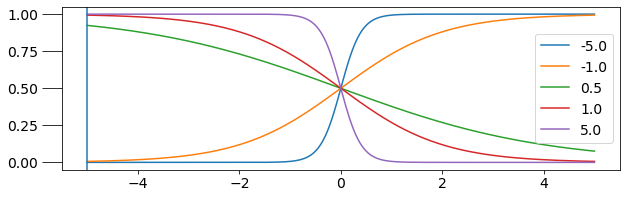

In [44]:
x = np.linspace(-5, 5, 1000)

for b in [-5, -1, 0.5, 1, 5]:
    plt.plot(x,logistic(x,b), label = '%0.1f' %b)

plt.axvline(x=-5)    
plt.legend()

Text(0.5, 0, 't')

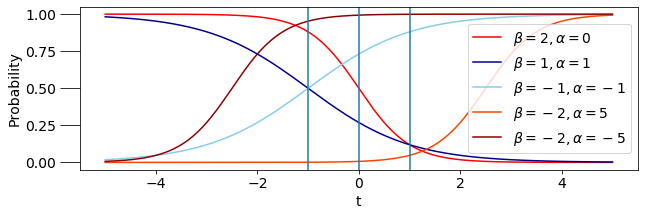

In [42]:
plt.plot(x, logistic(x, 2, 0), 
         label=r"$\beta = 2, \alpha = 0$", color="red")
plt.plot(x, logistic(x, 1, 1), 
         label=r"$\beta = 1, \alpha = 1$", color="darkblue")
plt.plot(x, logistic(x, -1, -1),
         label=r"$\beta = -1, \alpha = -1$",color="skyblue")
plt.plot(x, logistic(x, -2, 5), 
         label=r"$\beta = -2, \alpha = 5$", color="orangered")
plt.plot(x, logistic(x, -2, -5), 
         label=r"$\beta = -2, \alpha = -5$", color="darkred")
plt.axvline(x=0)
plt.axvline(x=1)

plt.axvline(x=-1)
plt.legend(); plt.ylabel('Probability'); plt.xlabel('t')

Text(0.5, 1.0, 'Normal Distributions')

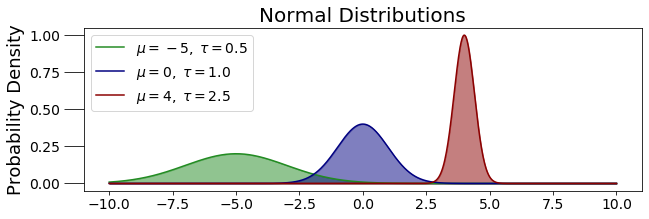

In [64]:
nor = stats.norm
x= np.linspace(-10,10,1000)

mu= (-5, 0, 4)
tau = (0.5, 1, 2.5)
colors = ("forestgreen", "navy", "darkred")

params= zip(mu,tau,colors)

for param in params:
    y= nor.pdf(x, loc = param[0], scale = 1/param[1])
    plt.plot(x,y, label = "$\mu = %d,\;\\tau = %.1f$" % (param[0], param[1]), color = param[2])
    plt.fill_between(x,y,color = param[2], alpha=0.5)
    
plt.legend()
plt.ylabel("Probability Density", size = 18)
plt.title("Normal Distributions", size = 20)

In [58]:
stats.norm?